In [1]:
#run this if you have not install sentence_transformer
#pip install sentence_transformers

In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#change your csv accordingly***
documents=pd.read_csv('JD_Source_B_Accountant_Week_09.csv')

documents['documents'] = documents['Job Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
documents_df=pd.DataFrame(documents,columns=['documents'])


[nltk_data] Downloading package stopwords to C:\Users\MASTER
[nltk_data]     ILYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
documents_df

,documents
0,Our client renowned within Real Estate industr...
1,"Our client, well-known Japanese company lookin..."
2,Benefits Summary: Salary: $2200 + Benefits Wor...
3,☑ $2000 - $2500 Basic + AWS + Variable Bonus ☑...
4,BIG FOUR AUDIT FIRM l RAFFLES PLACE Duration: ...
...,...
417,Position Summary Handling daily financial acco...
418,Job Description: Handle GeBIZ invoicing others...
419,"Job Scope: Perform full sets accounts - AP, AR..."
420,"Admin, HR, CS, Sales, Logistics & Accounts Sta..."


In [5]:
stop_words_l=stopwords.words('english')
documents_df['documents_cleaned']=documents_df.documents.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split()))

In [6]:
documents_df=pd.DataFrame(documents_df,columns=['documents_cleaned'])

In [7]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 0)

In [8]:
documents_df=documents_df.drop_duplicates(keep='first')

In [9]:
documents_df

,documents_cleaned
0,our client renowned within real estate industry located within central business district area they looking accounts executive join team good working location fullsets accounts prior supervisory experience added advantage real estate industry background job description maintain full set accounts ensure monthly reporting timelines duly met monthly management reports supervise accounts payable accounts receivable officers gst returns income tax computation property tax cash management forecast statutory accounts budgeting forecasting assist internal audit necessary assist ad hoc tasks necessary job requirements candidate must possess least diploma advanced higher graduate diploma bachelor s degree post graduate diploma professional degree economics finance accountancy banking business studies administration management mathematics commerce equivalent at least year s working experience related field required position applicants must willing work raffles place preferably senior executives specializing finance general cost accounting equivalent experience managing small team able work fast pace environment meet tight deadlines prior similar experience real estate must full time position s available interested applicants kindly click apply now i regret shortlisted applicants notified cazaja resources ea licence no c ea reg no r gwen goh kangping
1,our client well known japanese company looking suitable candidate position accounts executive payment responsibilities responsible gl payments related matters verification payment data assigned countries review approve supplier master data assigned countries assist month end closing processes liaise internal external auditors follow auditors queries requirements minimum diploma accountancy equivalent good experience shared service environment payment hub environment excellent communication skill good problem solving mindset for interested parties kindly send resume ms word format eejing loh persolsg com we regret shortlisted candidates notified capita pte ltd ea license no c rcb no m loh ee jing registration no r
2,benefits summary salary benefits working location redhill good working environment responsibilities perform accounts payable duties coding staff reimbursements data entries prepare process payments suppliers customer refunds assist accounting duties requirements applicants possess relevant qualifications employment background suitable skill sets welcome apply applicants possess considered individual merits applicants shortlisted role may matched suitable opportunities qualified interested candidates please submit updated resume ms format using apply now button alternatively may also email resume us mci mci com sg our dedicated approachable mci consultants get back soon confidential discussion please include following information resume education background work experiences point forms reason s leaving current expected salary date availability notice period we regret inform shortlisted candidates would notified to find career opportunities mci career services pte ltd visit www mci com sg complete jobs listing we wish best career search toh yen kiat edward registration number r ea license number c
3,basic aws variable bonus japan mnc company direct sales organisation working location serangoon career progression good remuneration package responsibilities handle partial accounts ar ap administration role follow payment schedule customers email customers calling customers check payment sending monthly statements assist car rental matters vetting legal documents requirements candidate must possess least diploma accounting relevant field bilingual mandarin liaise mandarin speaking customers candidates encouraged apply position via apply now button following information resume work experiences job responsibilities current expected salary reason leaving date availability education background
4,big four audit firm l raffles place duration imm months working hours mon f

### Corpus Dataframe

In [10]:
documents_df['documents_cleaned']

0      our client renowned within real estate industry located within central business district area  they looking accounts executive join team    good working location   fullsets accounts   prior supervisory experience added advantage   real estate industry background job description  maintain full set accounts ensure monthly reporting timelines duly met monthly management reports supervise accounts payable accounts receivable officers gst returns   income tax computation property tax cash management forecast statutory accounts budgeting forecasting assist internal audit necessary assist ad hoc tasks necessary job requirements  candidate must possess least diploma  advanced higher graduate diploma  bachelor s degree  post graduate diploma  professional degree  economics  finance accountancy banking  business studies administration management  mathematics  commerce equivalent  at least   year s  working experience related field required position  applicants must willing work raffles pl

In [11]:
tokensized_jd = documents_df.loc[0, "documents_cleaned"]
print(tokensized_jd)

our client renowned within real estate industry located within central business district area  they looking accounts executive join team    good working location   fullsets accounts   prior supervisory experience added advantage   real estate industry background job description  maintain full set accounts ensure monthly reporting timelines duly met monthly management reports supervise accounts payable accounts receivable officers gst returns   income tax computation property tax cash management forecast statutory accounts budgeting forecasting assist internal audit necessary assist ad hoc tasks necessary job requirements  candidate must possess least diploma  advanced higher graduate diploma  bachelor s degree  post graduate diploma  professional degree  economics  finance accountancy banking  business studies administration management  mathematics  commerce equivalent  at least   year s  working experience related field required position  applicants must willing work raffles place  pr

#### BERT model

In [12]:
documents_df['documents_cleaned'][1]

'our client  well known japanese company looking suitable candidate position accounts executive   payment  responsibilities  responsible gl payments related matters verification payment data assigned countries review approve supplier master data assigned countries assist month end closing processes liaise internal external auditors follow auditors  queries requirements  minimum diploma accountancy equivalent good experience shared service environment payment hub environment excellent communication skill good problem solving mindset for interested parties  kindly send resume ms word format eejing loh persolsg com we regret shortlisted candidates notified  capita pte ltd   ea license no     c       rcb no           m loh ee jing   registration no   r       '

In [13]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [14]:
document_embeddings =(documents_df['documents_cleaned'].values.tolist())

In [15]:
document_embeddings

['our client renowned within real estate industry located within central business district area  they looking accounts executive join team    good working location   fullsets accounts   prior supervisory experience added advantage   real estate industry background job description  maintain full set accounts ensure monthly reporting timelines duly met monthly management reports supervise accounts payable accounts receivable officers gst returns   income tax computation property tax cash management forecast statutory accounts budgeting forecasting assist internal audit necessary assist ad hoc tasks necessary job requirements  candidate must possess least diploma  advanced higher graduate diploma  bachelor s degree  post graduate diploma  professional degree  economics  finance accountancy banking  business studies administration management  mathematics  commerce equivalent  at least   year s  working experience related field required position  applicants must willing work raffles place  

In [16]:

#Compute embeddings
embeddings = model.encode(document_embeddings,convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
            pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

print(len(pairs))


for pair in pairs[0:200]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(document_embeddings[i], document_embeddings[j], pair['score']))

    #df = pd.DataFrame(columns=['A'])
    #df = df.append({'A': document_embeddings[i]}, ignore_index=True)

    #tempdf = pd.DataFrame(pair['index'], columns=["Score"])
    #df = pd.concat([df, tempdf], axis=0)
    #df=pd.DataFrame(list(zip(document_embeddings[i],document_embeddings[j],pair['score'])),columns=["i","j","Score"])

33153
responsibilities   provide administrative support including data entry  photocopy  organise file documents  etc   liaise various departments collection information documents   verify supporting documents prepare invoices revenue booking   monitor accounts receivables non payments  delayed payments irregularities   prepare monthly report update management status outstanding receivables   verify process supplier invoices  travel reimbursements employee claims  stop void payments  well review transactions accordance company policies   perform monthly reconciliation supplier statement accounts   investigate resolve customers   suppliers queries   any ad hoc duties assigned qualifications   requirements   at least diploma holder   good communication skills  ability communicate various departments levels   able take pressure work within tight deadlines   outgoing personality enjoy working people   meticulous positive attitude up          am   pm    boon lay way  tradehub     singapore 

In [17]:
#Compute embeddings
embeddings = model.encode(document_embeddings,convert_to_tensor=False)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
results_list = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
            pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})
            
#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

print(len(pairs))
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame(columns=["Text1","Text2","Score"])

for pair in pairs[0:200]:
    i, j = pair['index']
    df = df.append({"Text1":document_embeddings[i],"Text2":document_embeddings[j],"Score":pair['score']},ignore_index=True)
"""
    print("{} \t\t {} \t\t Score: {:.4f}".format(document_embeddings[i], document_embeddings[j], pair['score']))
    # Initiate an empty list to store results.
    
df = pd.DataFrame(columns=["Text","Predicted as"])
for text, predicted in zip(texts, predictions):
    df = df.append({"Text":text,"Predicted as":id_to_category[predicted]})





    results_list = []

    # Two loops to compare each vector with another vector only once.
    for i in range(len(vector_list)):
        # Get first vector
        vector1 = vector_list[i]

        for j in range(i+1, len(vector_list)):
            # Get the next vector
            vector2 = vector_list[j]

            # Calculate cosine similarity
            similarity_score = cosine_similarity(vector1, vector2, ndigits)

            # Append to results list if similarity score is between 1 and the threshold.
            # Note that scores of 1 can be ignored here if we want to exclude people with the same name.
            if 1 >= similarity_score >= similarity_threshold:
                results_list.append(document_embeddings[i], document_embeddings[j],pair['score'])

            else:
                pass

    # Convert list to dataframe.
    results_df = pd.DataFrame(results_list)
    if len(results_df) != 0:
        results_df.columns = ['full_name', 'comparison_name', 'similarity_score']
    else:
    # Can add error here if there's no results to return if desired.
    pass
"""

33153


C:\conda_tmp\ipykernel_23240\2018199211.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Text1":document_embeddings[i],"Text2":document_embeddings[j],"Score":pair['score']},ignore_index=True)
C:\conda_tmp\ipykernel_23240\2018199211.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Text1":document_embeddings[i],"Text2":document_embeddings[j],"Score":pair['score']},ignore_index=True)
C:\conda_tmp\ipykernel_23240\2018199211.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Text1":document_embeddings[i],"Text2":document_embeddings[j],"Score":pair['score']},ignore_index=True)
C:\conda_tmp\ipykernel_23240\2018199211.py:24: FutureWarning: The frame.append method is depre

'\n    print("{} \t\t {} \t\t Score: {:.4f}".format(document_embeddings[i], document_embeddings[j], pair[\'score\']))\n    # Initiate an empty list to store results.\n    \ndf = pd.DataFrame(columns=["Text","Predicted as"])\nfor text, predicted in zip(texts, predictions):\n    df = df.append({"Text":text,"Predicted as":id_to_category[predicted]})\n\n\n\n\n\n    results_list = []\n\n    # Two loops to compare each vector with another vector only once.\n    for i in range(len(vector_list)):\n        # Get first vector\n        vector1 = vector_list[i]\n\n        for j in range(i+1, len(vector_list)):\n            # Get the next vector\n            vector2 = vector_list[j]\n\n            # Calculate cosine similarity\n            similarity_score = cosine_similarity(vector1, vector2, ndigits)\n\n            # Append to results list if similarity score is between 1 and the threshold.\n            # Note that scores of 1 can be ignored here if we want to exclude people with the same name.\n

In [18]:
pd.set_option('display.max_colwidth', None)

In [19]:
df

,Text1,Text2,Score
0,responsibilities provide administrative support including data entry photocopy organise file documents etc liaise various departments collection information documents verify supporting documents prepare invoices revenue booking monitor accounts receivables non payments delayed payments irregularities prepare monthly report update management status outstanding receivables verify process supplier invoices travel reimbursements employee claims stop void payments well review transactions accordance company policies perform monthly reconciliation supplier statement accounts investigate resolve customers suppliers queries any ad hoc duties assigned qualifications requirements at least diploma holder good communication skills ability communicate various departments levels able take pressure work within tight deadlines outgoing personality enjoy working people meticulous positive attitude up am pm boon lay way tradehub singapore job code rinc email address tc capitagrp com as position urgent kindly email detailed cv attention rinc current expected salary notice period reason leaving job we regret inform shortlisted candidates notified by submitting curriculum vitae personal data us connection job application deemed read agreed terms privacy policy consented collection use disclosure personal data us affiliates accordance privacy policy please visit www capitagrp com copy privacy policy if wish withdraw consent please drop us email let us know capita pte ltd ea license no c chua mei xi rina r,responsibilities provide administrative support including data entry photocopy organise file documents etc liaise various departments collection information documents verify supporting documents prepare invoices revenue booking monitor accounts receivables non payments delayed payments irregularities prepare monthly report update management status outstanding receivables verify process supplier invoices travel reimbursements employee claims stop void payments well review transactions accordance company policies perform monthly reconciliation supplier statement accounts investigate resolve customers suppliers queries any ad hoc duties assigned qualifications requirements at least diploma holder good communication skills ability communicate various departments levels able take pressure work within tight deadlines outgoing personality enjoy working people meticulous positive attitude job code rinc email address tc capitagrp com as position urgent kindly email detailed cv attention rinc current expected salary notice period reason leaving job we regret inform shortlisted candidates notified by submitting curriculum vitae personal data us connection job application deemed read agreed terms privacy policy consented collection use disclosure personal data us affiliates accordance privacy policy please visit www capitagrp com copy privacy policy if wish withdraw consent please drop us email let us know capita pte ltd ea license no c chua mei xi rina r,tensor(0.9953)
1,accounts executive duration year contract location kaki bukit working hours mon fri am pm job responsibilties prepare jv pv issue cheque update cash book process staff claim matching sales invoices inclusive scanning pass admin mailing ensure customer peter global s document order mailing scan inside sale liaise vendor dispute invoices ensure invoices receive time month end closing receive invoice fedex dhl make sure proper awb attached daily update rockwell invoice status warranty eoc issue ensure store personnel done grn system monthly reconciliation vendor sga monthly reconcile ap aging gl monthly accrued purchases grn without invoices requirements minimum possess diploma accountancy preferably years relevant working experience good numbers meticulous organized oriented job code vant email address os capitagrp com as position urgent kindly email detailed cv contact us attention vant current expected salary notice period reason leaving job we regret inform shortlisted 

In [20]:
df.dtypes

Text1    object
Text2    object
Score    object
dtype: object

In [21]:
df['Score'] = df['Score'].astype(str)

In [22]:
df['Score'] = df['Score'].str.replace("tensor","").str.replace("(","").str.replace(")","")

df

C:\conda_tmp\ipykernel_23240\3999586597.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Score'] = df['Score'].str.replace("tensor","").str.replace("(","").str.replace(")","")


,Text1,Text2,Score
0,responsibilities provide administrative support including data entry photocopy organise file documents etc liaise various departments collection information documents verify supporting documents prepare invoices revenue booking monitor accounts receivables non payments delayed payments irregularities prepare monthly report update management status outstanding receivables verify process supplier invoices travel reimbursements employee claims stop void payments well review transactions accordance company policies perform monthly reconciliation supplier statement accounts investigate resolve customers suppliers queries any ad hoc duties assigned qualifications requirements at least diploma holder good communication skills ability communicate various departments levels able take pressure work within tight deadlines outgoing personality enjoy working people meticulous positive attitude up am pm boon lay way tradehub singapore job code rinc email address tc capitagrp com as position urgent kindly email detailed cv attention rinc current expected salary notice period reason leaving job we regret inform shortlisted candidates notified by submitting curriculum vitae personal data us connection job application deemed read agreed terms privacy policy consented collection use disclosure personal data us affiliates accordance privacy policy please visit www capitagrp com copy privacy policy if wish withdraw consent please drop us email let us know capita pte ltd ea license no c chua mei xi rina r,responsibilities provide administrative support including data entry photocopy organise file documents etc liaise various departments collection information documents verify supporting documents prepare invoices revenue booking monitor accounts receivables non payments delayed payments irregularities prepare monthly report update management status outstanding receivables verify process supplier invoices travel reimbursements employee claims stop void payments well review transactions accordance company policies perform monthly reconciliation supplier statement accounts investigate resolve customers suppliers queries any ad hoc duties assigned qualifications requirements at least diploma holder good communication skills ability communicate various departments levels able take pressure work within tight deadlines outgoing personality enjoy working people meticulous positive attitude job code rinc email address tc capitagrp com as position urgent kindly email detailed cv attention rinc current expected salary notice period reason leaving job we regret inform shortlisted candidates notified by submitting curriculum vitae personal data us connection job application deemed read agreed terms privacy policy consented collection use disclosure personal data us affiliates accordance privacy policy please visit www capitagrp com copy privacy policy if wish withdraw consent please drop us email let us know capita pte ltd ea license no c chua mei xi rina r,0.9953173398971558
1,accounts executive duration year contract location kaki bukit working hours mon fri am pm job responsibilties prepare jv pv issue cheque update cash book process staff claim matching sales invoices inclusive scanning pass admin mailing ensure customer peter global s document order mailing scan inside sale liaise vendor dispute invoices ensure invoices receive time month end closing receive invoice fedex dhl make sure proper awb attached daily update rockwell invoice status warranty eoc issue ensure store personnel done grn system monthly reconciliation vendor sga monthly reconcile ap aging gl monthly accrued purchases grn without invoices requirements minimum possess diploma accountancy preferably years relevant working experience good numbers meticulous organized oriented job code vant email address os capitagrp com as position urgent kindly email detailed cv contact us attention vant current expected salary notice period reason leaving job we regret inform shortlis

In [23]:
df['Score'] = df['Score'].astype(np.float64)

df.dtypes

Text1     object
Text2     object
Score    float64
dtype: object

In [24]:
df

,Text1,Text2,Score
0,responsibilities provide administrative support including data entry photocopy organise file documents etc liaise various departments collection information documents verify supporting documents prepare invoices revenue booking monitor accounts receivables non payments delayed payments irregularities prepare monthly report update management status outstanding receivables verify process supplier invoices travel reimbursements employee claims stop void payments well review transactions accordance company policies perform monthly reconciliation supplier statement accounts investigate resolve customers suppliers queries any ad hoc duties assigned qualifications requirements at least diploma holder good communication skills ability communicate various departments levels able take pressure work within tight deadlines outgoing personality enjoy working people meticulous positive attitude up am pm boon lay way tradehub singapore job code rinc email address tc capitagrp com as position urgent kindly email detailed cv attention rinc current expected salary notice period reason leaving job we regret inform shortlisted candidates notified by submitting curriculum vitae personal data us connection job application deemed read agreed terms privacy policy consented collection use disclosure personal data us affiliates accordance privacy policy please visit www capitagrp com copy privacy policy if wish withdraw consent please drop us email let us know capita pte ltd ea license no c chua mei xi rina r,responsibilities provide administrative support including data entry photocopy organise file documents etc liaise various departments collection information documents verify supporting documents prepare invoices revenue booking monitor accounts receivables non payments delayed payments irregularities prepare monthly report update management status outstanding receivables verify process supplier invoices travel reimbursements employee claims stop void payments well review transactions accordance company policies perform monthly reconciliation supplier statement accounts investigate resolve customers suppliers queries any ad hoc duties assigned qualifications requirements at least diploma holder good communication skills ability communicate various departments levels able take pressure work within tight deadlines outgoing personality enjoy working people meticulous positive attitude job code rinc email address tc capitagrp com as position urgent kindly email detailed cv attention rinc current expected salary notice period reason leaving job we regret inform shortlisted candidates notified by submitting curriculum vitae personal data us connection job application deemed read agreed terms privacy policy consented collection use disclosure personal data us affiliates accordance privacy policy please visit www capitagrp com copy privacy policy if wish withdraw consent please drop us email let us know capita pte ltd ea license no c chua mei xi rina r,0.995317
1,accounts executive duration year contract location kaki bukit working hours mon fri am pm job responsibilties prepare jv pv issue cheque update cash book process staff claim matching sales invoices inclusive scanning pass admin mailing ensure customer peter global s document order mailing scan inside sale liaise vendor dispute invoices ensure invoices receive time month end closing receive invoice fedex dhl make sure proper awb attached daily update rockwell invoice status warranty eoc issue ensure store personnel done grn system monthly reconciliation vendor sga monthly reconcile ap aging gl monthly accrued purchases grn without invoices requirements minimum possess diploma accountancy preferably years relevant working experience good numbers meticulous organized oriented job code vant email address os capitagrp com as position urgent kindly email detailed cv contact us attention vant current expected salary notice period reason leaving job we regret inform shortlisted candid

In [25]:
# Group Text2 to Text1 with top 3 scores
df5 = df.groupby(['Text1']).apply(lambda x: x.sort_values(['Score'], ascending=False).head(3)
.drop('Text1', axis=1))

In [26]:
df5

Text2     Score
Text1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 order number               responsibilities  responsible handling full set accounts  ap  ar  gl  manage maintain clients  accounting matters provide booking keeping services prepare monthly quarterly semi annual annual financial managing report assisting corporate secretary matters preparation booking keeping submission income tax returns any ad hoc duties assigned requirements  min diploma   degree minimum     years full set accounting experience  ap  ar  gl    fresh graduate welcome  training provided  knowledge using myob software advantageous strong interpersonal skills flexible mindset working hours  mond

In [27]:
#Taking in only scores with 0.7 and above 
df6 = df5[df5["Score"] >= 0.7]

In [28]:
df6

Text2     Score
Text1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 order number               responsibilities  responsible handling full set accounts  ap  ar  gl  manage maintain clients  accounting matters provide booking keeping services prepare monthly quarterly semi annual annual financial managing report assisting corporate secretary matters preparation booking keeping submission income tax returns any ad hoc duties assigned requirements  min diploma   degree minimum     years full set accounting experience  ap  ar  gl    fresh graduate welcome  training provided  knowledge using myob software advantageous strong interpersonal skills flexible mindset working hours  mond

In [29]:
df6a = df6.reset_index(level=['Text1'])

In [30]:
df6a

,Text1,Text2,Score
48,order number responsibilities responsible handling full set accounts ap ar gl manage maintain clients accounting matters provide booking keeping services prepare monthly quarterly semi annual annual financial managing report assisting corporate secretary matters preparation booking keeping submission income tax returns any ad hoc duties assigned requirements min diploma degree minimum years full set accounting experience ap ar gl fresh graduate welcome training provided knowledge using myob software advantageous strong interpersonal skills flexible mindset working hours monday friday office hours office location central to apply kindly email updated resume cv weidy goodjobcreations com sg please include following details us conduct effective job matching expected last drawn salary earliest availability date notice period we regret shortlisted candidates notified however rest assured applications updated resume bank future opportunities ea personnel name chong gui feng weidy ea personnel registration number r ea license no c,responsiblities perform accounting duties ap ar bank reconciliation invoicing data entry handle general admin duties assist preparing monthly reports perform day end closing prepare payment vouchers reminder notices perform counter duties rotation basis collection payments answer queries requirements years relevant working experience accounts ar ap diploma degree accountancy equivalent good financial accounting knowledge how to apply qualified interested candidates please submit updated resume ms format using apply now button email alexfong mci com sg our dedicated approachable mci consultants get back soon confidential discussion please include following information resume education background work experiences point forms reason s leaving current expected salary date availability notice period we regret inform shortlisted candidates would notified to find career opportunities mci career services pte ltd visit www mci com sg complete jobs listing we wish best career search fong ming fei alex registration number r ea license number c,0.879773
88,order number responsibilities this position comrises accounts hr admin duties respectively accounts duties partial accounting strong knowledge double entry input maintain accounts data stock control reports liaise vendors payment others accounts related duties assigned general hr admin duties input maintain hr general data excel reports filing sorting documents email correspondence other ad hoc duties assigned requirements minimum o level at least years experience accounting functions general admin experience knowledge ms office able commence work within short notice other information working hours monday friday office hours office location central to apply kindly email updated resume cv weidy goodjobcreations com sg please include following details us conduct effective job matching expected last drawn salary earliest availability date notice period we regret shortlisted candidates notified however rest assured applications updated resume bank future opportunities ea personnel name chong gui feng weidy ea personnel registration number r ea license no c,accounts executive job responsibilities prepare journals balance sheet schedules perform month end closing local books perform monthly closing analyses adhoc analyses assist forecast budget process assist liaise external auditors statutory agents filing gst withholding taxes necessary maintain fixed assets schedules other adhoc tasks necessary job requirements minimum degree accountancy diploma accountancy years relevant working experience audit experience bonus proficiency pc skills microsoft office must process savvy mind set process efficiency good organizational planning problem solving skills confident professional customer oriented disposition strong communication skills independent team player able start work immediately within short notice advantageous other information office location cen

In [31]:
# This is to group all related text2 into a list which belongs to text1
df8 = df6.groupby('Text1').agg({'Text2':lambda x: list(x)})

In [32]:
df8a = df8.reset_index(level=['Text1'])

In [33]:
df8a

,Text1,Text2
0,order number responsibilities responsible handling full set accounts ap ar gl manage maintain clients accounting matters provide booking keeping services prepare monthly quarterly semi annual annual financial managing report assisting corporate secretary matters preparation booking keeping submission income tax returns any ad hoc duties assigned requirements min diploma degree minimum years full set accounting experience ap ar gl fresh graduate welcome training provided knowledge using myob software advantageous strong interpersonal skills flexible mindset working hours monday friday office hours office location central to apply kindly email updated resume cv weidy goodjobcreations com sg please include following details us conduct effective job matching expected last drawn salary earliest availability date notice period we regret shortlisted candidates notified however rest assured applications updated resume bank future opportunities ea personnel name chong gui feng weidy ea personnel registration number r ea license no c,[responsiblities perform accounting duties ap ar bank reconciliation invoicing data entry handle general admin duties assist preparing monthly reports perform day end closing prepare payment vouchers reminder notices perform counter duties rotation basis collection payments answer queries requirements years relevant working experience accounts ar ap diploma degree accountancy equivalent good financial accounting knowledge how to apply qualified interested candidates please submit updated resume ms format using apply now button email alexfong mci com sg our dedicated approachable mci consultants get back soon confidential discussion please include following information resume education background work experiences point forms reason s leaving current expected salary date availability notice period we regret inform shortlisted candidates would notified to find career opportunities mci career services pte ltd visit www mci com sg complete jobs listing we wish best career search fong ming fei alex registration number r ea license number c ]
1,order number responsibilities this position comrises accounts hr admin duties respectively accounts duties partial accounting strong knowledge double entry input maintain accounts data stock control reports liaise vendors payment others accounts related duties assigned general hr admin duties input maintain hr general data excel reports filing sorting documents email correspondence other ad hoc duties assigned requirements minimum o level at least years experience accounting functions general admin experience knowledge ms office able commence work within short notice other information working hours monday friday office hours office location central to apply kindly email updated resume cv weidy goodjobcreations com sg please include following details us conduct effective job matching expected last drawn salary earliest availability date notice period we regret shortlisted candidates notified however rest assured applications updated resume bank future opportunities ea personnel name chong gui feng weidy ea personnel registration number r ea license no c,"[accounts executive job responsibilities prepare journals balance sheet schedules perform month end closing local books perform monthly closing analyses adhoc analyses assist forecast budget process assist liaise external auditors statutory agents filing gst withholding taxes necessary maintain fixed assets schedules other adhoc tasks necessary job requirements minimum degree accountancy diploma accountancy years relevant working experience audit experience bonus proficiency pc skills microsoft office must process savvy mind set process efficiency good organizational planning problem solving skills confident professional customer oriented disposition strong communication skills independent team player able start work immediately within short notice advantageous other information office location central interes

In [34]:
# We start by defining the structure of the graph
top_frame = df6a
edges = list(zip(top_frame['Text1'], top_frame['Text2']))
weighted_edges = list(zip(top_frame['Text1'], top_frame['Text2'], top_frame['Score']))
nodes = list(set(top_frame['Text1']).union(set(top_frame['Text2'])))

In [35]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G.add_weighted_edges_from(weighted_edges)

In [36]:
# !pip install python-louvain
import community
partition = community.best_partition(G)
modularity = community.modularity(partition, G)

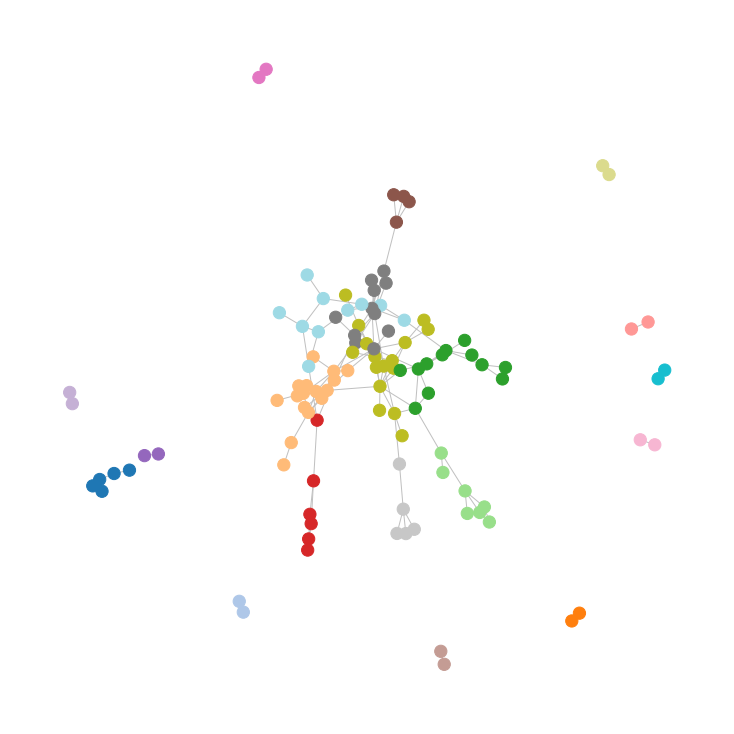

In [37]:
# Takes some time for larger graphs
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, dim=2)
community_id = [partition[node] for node in G.nodes()]
fig = plt.figure(figsize=(10,10))
nx.draw(G, pos, edge_color = ['silver']*len(G.edges()), cmap=plt.cm.tab20,
        node_color=community_id, node_size=150)

In [38]:
title, cluster = [], []
for i in partition.items():
    title.append(i[0])
    cluster.append(i[1])
    
frame_clust = pd.DataFrame([pd.Series(title), pd.Series(cluster)]).transpose()
frame_clust.columns = ['Text1', 'Cluster']

In [39]:
frame_clust

,Text1,Cluster
0,ap ar duties monthly intercompany payments reconciliation update analyze net payables receivables weekly report reconciliation financial discrepancies collecting analyzing account information update forex rates assist month end closing liaise internal external parties purchasing team auditors tax agent etc support admin function other duties ad hoc projects assigned requirements possess least diploma equivalent least year s accounting experience an independent team player able work pressure meet dateline knowledge accpac ms office interested candidates wish apply advertised position please email us updated copy resume attn ashw contact office confidential discussion we regret shortlisted candidates notified job code ashw email address cap ta capitasingapore com ea license no c,19
1,roles responsibilities handling full set accounts subsidiaries responsible tax gst reporting prepare monthly financial statements reports proper systematic filling documents experience handling payroll hr matters e g application employment pass cpf submission advantage handle ad hoc duties task assigned proactive able work independently minimum supervision requirements minimum diploma accountancy lcci minimum years experience full set accounts able work pressure meet deadlines strong analytical interpersonal communication skills self initiative independent hardworking experience accpac preferred able start work immediately short notice day week raffles place mnc environment interested candidate please send detailed resume photo damien lee maestrohr com sg maestro hr damien lee tian hong r c,15
2,job responsibilities perform monthly intercompany reconciliations monitor daily bank position timely update receipt client account proper control collections attend queries issue complaints finance related matters preparation monthly debtor aging reports prepare weekly ar summary coordinate closely business commercial team perform banking functions collection forecast prepare bank reconciliations job requirements candidate must possess least diploma advanced higher graduate diploma finance accountancy banking equivalent at least year s working experience related field required position preferably junior executive specialized finance general cost accounting equivalent,3
3,accounts executive responsibilities perform ar ap duties maintains cash book assist month end closing follow outstanding receivables verifying suppliers invoices sales invoices provide general accounting support accountant handle daily pos collections prepares financial management report any ad hoc duties assigned requirements min gce o level ite business diploma accounting lcci cat qualification years relevant working experience retail supoort familiar pos systems tender types payments retail meticulous eye details precise organised efficient able work independently well effective team player possess positive working attitude energetic andproactive able work pressure meet tight deadline knowledge using navision accounting software added advantage able start work within short notice,3
4,responsibilities perform ar ap duties maintains cash book assist month end closing follow outstanding receivables verifying suppliers invoices sales invoices provide general accounting support accountant handles intercompany billing handle letter credit prepares financial management report any ad hoc duties assigned requirements min diploma accounting lcci cat acca qualification at least year s relevant working experience meticulous eye details precise organised efficient able work independently well effective team player possess positive working attitude energetic proactive able work pressure meet tight deadline knowledge using navision accounting software added advantage able start work within short notice preferably junior executives specializing finance general cost accounting equivalent able commit least six months,3
...,...,...
107,monthly intercompany payments reconciliation update ana

In [40]:
frame_clust.sort_values(by=['Cluster'])
frame_clust.dtypes

Text1      object
Cluster    object
dtype: object

In [41]:
frame_clust['Cluster'] = frame_clust['Cluster'].astype(np.int)

frame_clust.dtypes

C:\conda_tmp\ipykernel_23240\3507576849.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frame_clust['Cluster'] = frame_clust['Cluster'].astype(np.int)


Text1      object
Cluster     int32
dtype: object

In [42]:
# !pip install natsort

In [43]:
from natsort import index_natsorted

In [44]:
# Use natural sorting to sort the clusters accordingly.
dfn = frame_clust

dfn.sort_values(
   by="Cluster",
   key=lambda x: np.argsort(index_natsorted(dfn["Cluster"])))

,Text1,Cluster
39,candidate must possess least diploma advanced higher graduate diploma finance accountancy banking equivalent at least year s working experience related field required position required skill s creativity organization strong interpersonal leadership analytical decision making management client relation speaking skills preferably junior executive specialized finance general cost accounting equivalent to match invoice signed do po mr to prepare payment voucher approval relevant department to update project costing excel file ie material cost subcontractor cost on checking suppliers invoices delivery order issuance payment authorisation form update labour cost materials sub contract works expenses compile finalise job costing issuance monthly debtors statement accounts,0
40,candidate must possess least diploma advanced higher graduate diploma finance accountancy banking human resource management secretarial equivalent at least year s working experience related field required position preferably junior executive specialized banking financial services equivalent perform accounts payable duties coding staff reimbursement data entries prepare process payments suppliers assist accounting duties assist general manager hr matters includling staff contracts payroll handling ar function including prepare invoices maintaining record payment clinics assist month end closing handling recording general manager directors petty cash reimbursement expenses perform bank transactions maintain proper documentations,0
78,candidate must possess least diploma advanced higher graduate diploma finance accountancy banking equivalent required language s english chinese order liaise chinese speaking associates at least year s working experience related field required position required skill s myob microsoft office able keep track creditors debtors able basic monthly report preferably junior executive specialized finance general cost accounting equivalent,0
85,candidate must possess least diploma advanced higher graduate diploma finance accountancy banking equivalent at least year s working experience related field required position required skill s able handle full set acounting work knowledge myob similar software knowledge ms word excel able report writing analysis work good time management skill preferably junior executive specialized finance general cost accounting equivalent,0
93,candidate must possess least professional certificate nitec finance accountancy banking equivalent at least year s working experience related field required position required skill s knowledge ms word excel knowledge power point able handle full set accounts knowledge myob similar software able communicate english written spoken good time management skill preferably entry level specialized clerical administrative support equivalent,0
...,...,...
72,responsiblities perform accounting duties ap ar bank reconciliation invoicing data entry handle general admin duties assist preparing monthly reports perform day end closing prepare payment vouchers reminder notices perform counter duties rotation basis collection payments answer queries requirements years relevant working experience accounts ar ap diploma degree accountancy equivalent good financial accounting knowledge how to apply qualified interested candidates please submit updated resume ms format using apply now button email alexfong mci com sg our dedicated approachable mci consultants get back soon confidential discussion please include following information resume education background work experiences point forms reason s leaving current expected salary date availability notice period we regret inform shortlisted candidates would notified to find career opportunities mci career services pte ltd visit www mci com sg complete jobs listing we wish best career search fong ming fei alex registration number r ea license number c,19
86,we currently looking accounts assistant part finance team expected roles resp